# Pandas - Introduction

This notebook explans how to use `pandas` library for analysis of tabular data.

In [6]:
# Start using pandas (default import convention)
import pandas as pd
import numpy as np

In [7]:
# Let pandas speak for themselves
print(pd.__doc__)


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

Visit the official website for a nicely written documentation: https://pandas.pydata.org

In [8]:
# Current version (should be 1.2+ in 2021)
print(pd.__version__)

1.2.0


## Basic objects 

The **pandas** library has a vast API with many useful functions. However, most of this revolves
around two important classes:

* Series
* DataFrame

In this introduction, we will focus on them - what each of them does and how they relate to each other
and numpy objects.

### Series

Series is a one-dimensional data structure, central to pandas. 

For a complete API, visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [9]:
# My first series
series = pd.Series([1, 2, 3])
series

0    1
1    2
2    3
dtype: int64

This looks a bit like a Numpy array, does it not?

Actually, in most cases the Series wraps a Numpy array...

In [10]:
series.values  # The result is a Numpy array

array([1, 2, 3])

But there is something more. Alongside the values, we see that each item (or "row") has a certain label. The collection of labels is called **index**.

In [7]:
series.index

RangeIndex(start=0, stop=3, step=1)

This index (see below) can be used, as its name suggests, to index items of the series.

In [8]:
# Return an element from the series
series.loc[1]

2

In [12]:
# Or
series[1]

2

In [13]:
# Construction from a dictionary
series_ab = pd.Series({"a": 2, "b": 4})
series_ab

a    2
b    4
dtype: int64

**Exercise**: Create a series with 5 elements.

In [14]:
result = ...

### DataFrame

A **DataFrame** is pandas' answer to Excel sheets - it is a collection of named columns (or, in our case, a collection of **Series**).
Quite often, we directly read data frames from an external source, but it is possible to create them from:
* a dict of Series, numpy arrays or other array-like objects
* from an iterable of rows (where rows are Series, lists, dictionaries, ...)

In [11]:
# List of lists (no column names)
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(table)
table_df

,0,1
0,a,1
1,b,3
2,c,5


In [12]:
# Dict of Series (with column names)
df = pd.DataFrame({
    'number': pd.Series([1, 2, 3, 4], dtype=np.int8),
    'letter': pd.Series(['a', 'b', 'c', 'd'])
})
df

,number,letter
0,1,a
1,2,b
2,3,c
3,4,d


In [13]:
# Numpy array (10x2), specify column names
data = np.random.normal(0, 1, (10, 2))

df = pd.DataFrame(data, columns=['a', 'b'])
df

,a,b
0,-0.151094,0.620504
1,1.079026,0.661127
2,0.939989,0.680886
3,-1.074480,-0.505432
4,0.308885,-0.056605
5,0.385703,-0.439074
6,-0.997798,0.854515
7,1.446471,0.909953
8,-0.265625,0.062340
9,-0.838772,-1.227986


In [14]:
# A DataFrame also has an index.
df.index

RangeIndex(start=0, stop=10, step=1)

In [15]:
# The columns also form an index.
df.columns

Index(['a', 'b'], dtype='object')

In [16]:
# ...that is shared by all columns
df.index is df["a"].index

True

## D(ata) types

Pandas builds upon the numpy data types (mentioned earlier) and adds a couple of more.

In [17]:
typed_df = pd.DataFrame({
  "bool": np.arange(5) % 2 == 0,
  "int": range(5),
  "int[nan]": pd.Series([np.nan, 0, 1, 2, 3], dtype="Int64"),
  "float": np.arange(5) * 3.14,
  "object": [None, 1, "2", [3, 4], 5 + 6j],
  "string?": ["a", "b", "c", "d", "e"],
  "string!": pd.Series(["a", "b", "c", "d", "e"], dtype="string"),
  "datetime": pd.date_range('2018-01-01', periods=5, freq='3M'),
  "timedelta": pd.timedelta_range(0, freq="1s", periods=5),
  "category": pd.Series(["animal", "plant", "animal", "animal", "plant"], dtype="category")
})
typed_df

,bool,int,int[nan],float,object,string?,string!,datetime,timedelta,category
0,True,0,<NA>,0.00,None,a,a,2018-01-31,0 days 00:00:00,animal
1,False,1,0,3.14,1,b,b,2018-04-30,0 days 00:00:01,plant
2,True,2,1,6.28,2,c,c,2018-07-31,0 days 00:00:02,animal
3,False,3,2,9.42,"[3, 4]",d,d,2018-10-31,0 days 00:00:03,animal
4,True,4,3,12.56,(5+6j),e,e,2019-01-31,0 days 00:00:04,plant


In [18]:
typed_df.dtypes

bool                    bool
int                    int64
int[nan]               Int64
float                float64
object                object
string?               object
string!               string
datetime      datetime64[ns]
timedelta    timedelta64[ns]
category            category
dtype: object

We will see some of the types practically used in further analysis.

## Indices & indexing



In [19]:
abc_series = pd.Series(range(3), index=["a", "b", "c"])
abc_series

a    0
b    1
c    2
dtype: int64

In [20]:
abc_series.index

Index(['a', 'b', 'c'], dtype='object')

In [21]:
abc_series.index = ["c", "d", "e"]  # Changes the labels in-place!
abc_series.index.name = "letter"
abc_series

letter
c    0
d    1
e    2
dtype: int64

In [22]:
table = [
    ['a', 1],
    ['b', 3],
    ['c', 5]
]
table_df = pd.DataFrame(
    table,
    index=["first", "second", "third"],
    columns=["alpha", "beta"]
)
table_df

,alpha,beta
first,a,1
second,b,3
third,c,5


In [23]:
alpha = table_df["alpha"]  # Simple [] indexing in DataFrame returns Series
alpha

first     a
second    b
third     c
Name: alpha, dtype: object

In [24]:
alpha["second"]             # Simple [] indexing in Series returns scalar values.

'b'

In [25]:
alpha.second   # This also works

'b'

but careful!

In [26]:
alpha.first

<bound method NDFrame.first of first     a
second    b
third     c
Name: alpha, dtype: object>

A slice with a `["list", "of", "columns"]` yields a `DataFrame` with those columns. 

For example:

In [27]:
table_df[["beta", "alpha"]]

,beta,alpha
first,1,a
second,3,b
third,5,c


`[["column_name"]]` returs a `DataFrame` as well, not `Series`:

In [28]:
table_df[["alpha"]]

,alpha
first,a
second,b
third,c


There are two ways how to properly index rows & cells in the DataFrame:

- `loc` for label-based indexing
- `iloc` for order-based indexing (it does not use the **index** at all)

Note the square brackets. The mentioned attributes actually are not methods
but special "indexer" objects. They accept one or two arguments specifying
the position along one or both axes.

**Exercise:** Create `DataFrame` whose `x`-column is $0, \frac{1}{4}\pi, \frac{1}{2}\pi, .. 2\pi $, `y` column is `cos(x)` and index are `fractions` `0, 1/4, 1/2 ... 2`

In [29]:
import fractions

index = [fractions.Fraction(n, ___) for n in range(___)]
x = np.___([___ for ___ in ___])
y = ___

df = pd.DataFrame(___, index = ___)

# display
df

TypeError: 'method' object cannot be interpreted as an integer

#### loc


In [30]:
first = table_df.loc["first"]
first

alpha    a
beta     1
Name: first, dtype: object

In [31]:
table_df.loc["first", "beta"]            

1

In [32]:
table_df.loc["first":"second", "beta"]   # Use ranges (inclusive)

first     1
second    3
Name: beta, dtype: int64

#### iloc

In [33]:
table_df.iloc[1]

alpha    b
beta     3
Name: second, dtype: object

In [34]:
table_df.iloc[0:4:2]   # Select every second row

,alpha,beta
first,a,1
third,c,5


In [35]:
table_df.at["first", "beta"]

1

In [36]:
type(table_df.at)

pandas.core.indexing._AtIndexer

## Modifying DataFrames

Adding a new column is like assigning to adding a key/value pair to a dict.
Note that the operation, unlike most others, does modify the DataFrame.

In [37]:
from datetime import datetime
table_df["now"] = datetime.now()
table_df

,alpha,beta,now
first,a,1,2021-01-24 22:26:57.665710
second,b,3,2021-01-24 22:26:57.665710
third,c,5,2021-01-24 22:26:57.665710


Non-destructive version that returns a new DataFrame, uses the `assign` method:

In [38]:
table_df.assign(delta = [True, False, True])

,alpha,beta,now,delta
first,a,1,2021-01-24 22:26:57.665710,True
second,b,3,2021-01-24 22:26:57.665710,False
third,c,5,2021-01-24 22:26:57.665710,True


In [39]:
# However, the original DataFrame is not changed
table_df

,alpha,beta,now
first,a,1,2021-01-24 22:26:57.665710
second,b,3,2021-01-24 22:26:57.665710
third,c,5,2021-01-24 22:26:57.665710


Deleting a column is very easy too.

In [40]:
del table_df["now"]
table_df

,alpha,beta
first,a,1
second,b,3
third,c,5


The **drop** method works with both rows and columns (creating a new data frame).

In [41]:
table_df.drop("beta", axis=1)

,alpha
first,a
second,b
third,c


In [42]:
table_df.drop("second", axis=0)

,alpha,beta
first,a,1
third,c,5


**Exercise:** Use a combination of `reset_index`, `drop` and `set_index` to transform `table_df` into `pd.DataFrame({'index': table_df.index}, index=table_df["alpha"])`

In [43]:
results = table_df.___.___.___

# display
result

AttributeError: 'DataFrame' object has no attribute '___'

---
**Let's get some data!**

## I/O in pandas

More details can be found in the official documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Most of the functions for reading data are named `pandas.read_XXX`, where XXX is the format used. We will go through several commonly used ones.

### This tutorial data sets origins

* IMDB: https://datasets.imdbws.com/
* Box office (Kaggle / TMDB): https://www.kaggle.com/c/tmdb-box-office-prediction/data
* Awards: https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films
* Rotten Tomatoes: https://data.world/prasert/rotten-tomatoes-top-movies-by-genre
* Guardian: https://www.theguardian.com/news/datablog/2010/oct/16/greatest-films-of-all-time
* Wikipedia movies: https://github.com/prust/wikipedia-movie-data


In [44]:
# List functions for input in pandas.

print("\n".join(method for method in dir(pd) if method.startswith("read_")))

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_orc
read_parquet
read_pickle
read_sas
read_spss
read_sql
read_sql_query
read_sql_table
read_stata
read_table


### Read CSV

Nowadays, a lot of data comes in the textual Comma-separated values format (CSV).
Although not properly standardized, it is the de-facto standard for files that are not
huge and are meant to be read by human eyes too.

Let's read the population of U.S. states (and several other territories that we will need later):

In [45]:
territories = pd.read_csv("data/us_state_population.csv")
territories.head(9)

,Territory,Population
0,California,39368078
1,Texas,29360759
2,Florida,21733312
3,New York,19336776
4,Pennsylvania,12783254
5,Illinois,12587530
6,Ohio,11693217
7,Georgia,10710017
8,North Carolina,10600823


The automatic data type parsing automatically converts columns to appropriate types:

In [46]:
territories.dtypes

Territory     object
Population     int64
dtype: object

Sometimes the CSV input does not work out of the box. Although pandas automatically understands and reads zipped files,
it usually does not automatically infer the file format - for details, see the `read_csv` documentation here: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [47]:
pd.read_csv('../data/title.basics.tsv.gz')

FileNotFoundError: [Errno 2] No such file or directory: '../data/title.basics.tsv.gz'

...in this case, the CSV file does not use commas to separate values. Therefore, we need to specify a few more arguments:

In [50]:
imdb_titles = pd.read_csv('../data/title.basics.tsv.gz', sep='\t')
imdb_titles.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/title.basics.tsv.gz'

Noticed the `\N` endYear values?

**Exercise:** Use `na_values` argument to mark `\N` as a null (missing) value. 

In [51]:
%exercise

imdb_titles = pd.read_csv('../data/title.basics.tsv.gz', sep='\t', na_values=...)

UsageError: Line magic function `%exercise` not found.


In [52]:
%validate

assert pd.isna(imdb_titles.loc[0, 'endYear'])

UsageError: Line magic function `%validate` not found.


See the difference?

In [53]:
imdb_titles.head()

NameError: name 'imdb_titles' is not defined

### Read Excel

Let's read the list of laser accidents involving 

In [54]:
pd.read_excel("../data/guardian-greatest_films_of_all_time.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '../data/guardian-greatest_films_of_all_time.xlsx'

Hmmmmph... Pandas parsed just the first spreadsheet. Let's see what are the options. If in doubt, look in the documentation:
https://pandas.pydata.org/pandas-docs/stable/reference/io.html#excel

In [55]:
xlsx = pd.io.excel.ExcelFile("../data/guardian-greatest_films_of_all_time.xlsx")
xlsx

FileNotFoundError: [Errno 2] No such file or directory: '../data/guardian-greatest_films_of_all_time.xlsx'

In [56]:
xlsx.sheet_names

NameError: name 'xlsx' is not defined

In [57]:
xlsx.parse("HORROR")

NameError: name 'xlsx' is not defined

In [58]:
%exercise

crimes =...                    # Find the table of crime movies
tenth_best = crimes.loc[...]   # Find the 10-th best crime movie
movie_name = ...               # Get the name of the movie

# display
movie_name

UsageError: Line magic function `%exercise` not found.


In [59]:
%validate

assert movie_name[7:9] == "la"

UsageError: Line magic function `%validate` not found.


### Read HTML (Optional)

Pandas is able to scrape data from tables embedded in web pages using the `read_html` function.
This might or might not bring you good results and probably you will have to tweak your
data frame manually. But it is a good starting point - much better than being forced to parse
the HTML ourselves!

Let's download a list of highest-grossing films from wikipedia!

In [60]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_highest-grossing_films")
type(tables), len(tables)

(list, 93)

Does the page really contain 95 tables? The number is quite high and we must check which of the tables
are meaningful and which are not. We are mostly interested in the first displayed one.

**Exercise:** Find **i** to obtain the right table:

In [61]:
%exercise

i = ...

table = tables[i]
table.head(10)

UsageError: Line magic function `%exercise` not found.


### Write CSV

Pandas is able to write to many various formats but the usage is similar. 

In [ ]:
award_table.to_csv("awards.csv", index=False)

In [ ]:
%head awards.csv 10

Note: When done with this notebook, we suggest that you shutdown the kernel to free the memory.

# Pandas - Data manipulations

This notebook is the third part of the collection devoted to the pandas library.

In the previous notebook, we imported data from several data formats.
Let's start from there and see what basic manipulations we can do
with the DataFrames.

In [15]:
laser_incidents = pd.read_excel("https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2019_final.xlsx", usecols="A:J")
laser_incidents

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
0,2019-01-01,35,N3EG,C421,2500,SAT,Green,No,San Antonio,Texas
1,2019-01-01,43,RPA3469,E75S,4000,IAH,Green,No,Houston,Texas
2,2019-01-01,44,UAL1607,A319,4000,IAH,Green,No,Houston,Texas
3,2019-01-01,110,N205TM,BE20,2500,HDC,Green,No,Hammond,Louisiana
4,2019-01-01,115,JIA5233,CRJ9,2000,JAX,Green,No,Jacksonville,Florida
...,...,...,...,...,...,...,...,...,...,...
6131,2019-12-31,845,ASH5861,CRJ9,3000,JAN,Green,No,Jackson,Mississippi
6132,2019-12-31,929,N22P,CRUZ,2500,HNL,Green,No,Honolulu,Hawaii
6133,2019-12-31,2310,GTH530,GLF4,500,SJU,White,No,Carolina,Puerto Rico
6134,2019-12-31,2312,AMF6916,SW4,600,SJU,Green,No,Carolina,Puerto Rico


## First look at the data

Let's see what we have in the datasets...

In [16]:
laser_incidents.head()

,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State
0,2019-01-01,35,N3EG,C421,2500,SAT,Green,No,San Antonio,Texas
1,2019-01-01,43,RPA3469,E75S,4000,IAH,Green,No,Houston,Texas
2,2019-01-01,44,UAL1607,A319,4000,IAH,Green,No,Houston,Texas
3,2019-01-01,110,N205TM,BE20,2500,HDC,Green,No,Hammond,Louisiana
4,2019-01-01,115,JIA5233,CRJ9,2000,JAX,Green,No,Jacksonville,Florida


In [63]:
laser_incidents.tail()

NameError: name 'laser_incidents' is not defined

For an unknown, potentially unevenly distributed dataset, looking at the beginning / end is typically not the best idea. We'd rather sample randomly:

In [64]:
# Show a few examples
laser_incidents.sample(10)

NameError: name 'laser_incidents' is not defined

`describe` is often useful to get the basics statistics.

In [65]:
laser_incidents.describe(include="all")

NameError: name 'laser_incidents' is not defined

Notice that only some columns, to be procise columns with properly recognized numeric type, are reported.

### Column data types

In [66]:
laser_incidents.dtypes

NameError: name 'laser_incidents' is not defined

Let's investigate some of the columns...

To analyze **Laser Color**, we can look at its typical values.

In [67]:
laser_incidents["Laser Color"].describe()

NameError: name 'laser_incidents' is not defined

Not too many different values.

In [68]:
laser_incidents["Laser Color"].unique()

NameError: name 'laser_incidents' is not defined

In [69]:
laser_incidents["Laser Color"].value_counts(normalize=True)

NameError: name 'laser_incidents' is not defined

This column is a very good candidate to turn into a pandas-special, **Categorical** data type. (See https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

In [70]:
laser_incidents["Laser Color"].memory_usage(deep=True)   # ~60 bytes per item

NameError: name 'laser_incidents' is not defined

In [71]:
color_category = laser_incidents["Laser Color"].astype("category")
color_category.sample(10)

NameError: name 'laser_incidents' is not defined

In [72]:
color_category.memory_usage(deep=True)              # ~1-2 bytes per item

NameError: name 'color_category' is not defined

**Exercise:** Remember that assigning or replacing a column inside a dataframe works the same way as setting a value inside a dict.
Please, replace the original "Laser Color" column with the new Categorical series:

Pandas is generally quite good at guessing (inferring) number types. 
You may wonder why `startYear` is float and not int though. 
This is a consequence of not having an integer nan in numpy. There's been many discussions about this.

In [73]:
laser_incidents["Altitude"]

NameError: name 'laser_incidents' is not defined

In [74]:
imdb_titles.startYear.astype(int)

NameError: name 'imdb_titles' is not defined

In [75]:
# To address that, pandas 0.24 Introduced nullable integers
imdb_titles.startYear.astype("Int64").tail(20)

NameError: name 'imdb_titles' is not defined

### Filtering

Indexing in pandas Series / DataFrames (`[]`) support also boolean (masked) arrays. These arrays can be obtained by applying boolean operations on them.

You can also use standard **comparison operators** like `<`, `<=`, `==`, `>=`, `>`, `!=`. 

It is possible to perform **logical operators** with boolean series too. But note that `and`, `or`, `not` are keywords. You 

As an example, find all movies!

In [76]:
is_movie = (imdb_titles.titleType == "movie")
is_movie.sample(10)

NameError: name 'imdb_titles' is not defined

Now we can directly apply the boolean mask. (Note: This is no magic. You can construct the mask yourself)

In [77]:
imdb_titles[is_movie].sample(10)

NameError: name 'imdb_titles' is not defined

Or maybe we should include TV movies as well?

In [78]:
# isin takes an array of possible values
movie_titles = imdb_titles[imdb_titles.titleType.isin(["movie", "tvMovie"])]
movie_titles.sample(10)

NameError: name 'imdb_titles' is not defined

We may wonder why we have two title-ish columns: originalTitle and primaryTitle.

In [79]:
different_title = (movie_titles.originalTitle != movie_titles.primaryTitle)
different_title.name = "Different title"   # Series can have names (Note: DataFrames can't)
different_title.value_counts()

NameError: name 'movie_titles' is not defined

### Visualization intermezzo

Without much further ado, let's create our first plot.

In [80]:
different_title.value_counts().plot(kind="bar")

NameError: name 'different_title' is not defined

We may also want to get rid of wrong / incomplete data.

In [81]:
# Movies from the future?
imdb_titles[imdb_titles.startYear > 2019].startYear.value_counts()

NameError: name 'imdb_titles' is not defined

In [82]:
# Movies with startYear undefined
imdb_titles[imdb_titles.startYear.isna()].head()

NameError: name 'imdb_titles' is not defined

**Exercise:** Use the `imdb_titles.startYear > 2019` filter and `dropna` method to get rid of rows with wrong / undefined years.

In [87]:
%exercise

imdb_correct_titles = imdb_titles[___].dropna(subset=___)

UsageError: Line magic function `%exercise` not found.


In [88]:
%validate

assert not (imdb_correct_titles.startYear > 2019).any()
assert not imdb_correct_titles.startYear.isna().any()
assert imdb_correct_titles.shape == (1694587, 9)

UsageError: Line magic function `%validate` not found.


**Exercise:** Drop `titleType` and `endYear` columns and rows with `NaN` values (use `dropna`).

In [89]:
%exercise

movie_titles = (movie_titles
                .drop(columns=___)
                .___
                )

UsageError: Line magic function `%exercise` not found.


In [90]:
%validate

assert not any(result.isna().any())
assert sorted(result.columns) == ['genres', 'isAdult', 'originalTitle',  'primaryTitle', 
                                        'runtimeMinutes', 'startYear', 'tconst']

UsageError: Line magic function `%validate` not found.


## Sorting

In [91]:
# Display 5 longest movies 
movie_titles.sort_values("runtimeMinutes", ascending=False).head()

NameError: name 'movie_titles' is not defined

Hmm, let's look at *Modern Times Forever* - an apt title :)

In [92]:
IFrame(
    src="https://en.wikipedia.org/wiki/Modern_Times_Forever_(Stora_Enso_Building,_Helsinki)",
    width=900,
    height=400,
)

NameError: name 'IFrame' is not defined

In [93]:
# Alternative
movie_titles.nlargest(5, "runtimeMinutes")

NameError: name 'movie_titles' is not defined

**Exercise:** Find the 10 oldest movies that are longer than 2 hours

In [94]:
%exercise

result = movie_titles[___].___(___, ___)
result

UsageError: Line magic function `%exercise` not found.


In [95]:
%validate

assert result.iloc[9]["startYear"] == 1914

UsageError: Line magic function `%validate` not found.


In [96]:
movie_titles[(movie_titles["primaryTitle"].str.startswith("Indiana Jones")) & (movie_titles["titleType"] == "movie")]

NameError: name 'movie_titles' is not defined

## Arithmetics and string manipulation

Standard **arithmetic operators** work on numerical columms too. And so do mathematical functions. Note all such operations are performed in a vector-like fashion.

In [97]:
movie_titles[["originalTitle", "startYear"]].assign(age = 2019 - movie_titles["startYear"]).sample(20)

NameError: name 'movie_titles' is not defined

**Exercise:** Calculate the length of movies in hours.

In [98]:
%exercise

result = movie_titles[["originalTitle", "runtimeMinutes"]].assign(... = ...)
result.sample(10)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-98-4606e6fd5027>, line 3)

In [99]:
%validate

assert result.iloc[0]["hours"] == 0.75

UsageError: Line magic function `%validate` not found.


In [100]:
# If only the following had any sense!
np.sin(movie_titles["runtimeMinutes"]).sample(10)

NameError: name 'movie_titles' is not defined

### Summary statistics

Note that the following methods return scalars

In [101]:
# Average length of the movies
movie_titles["runtimeMinutes"].mean()

NameError: name 'movie_titles' is not defined

In [102]:
# Standard deviation
movie_titles["runtimeMinutes"].std()

NameError: name 'movie_titles' is not defined

In [103]:
movie_titles["startYear"].max()

NameError: name 'movie_titles' is not defined

**Exercise:** How many years would it take to watch all movies in the catalogue?

In [104]:
%exercise
result = movie_titles["runtimeMinutes"] ...
result

SyntaxError: invalid syntax (<ipython-input-104-32d9f7001148>, line 2)

In [105]:
%validate

assert np.round(result, 3) == 65.154

UsageError: Line magic function `%validate` not found.


### Basic string operations

These are typically accessed using the `.str` "accessor" of the Series like this:
    
- series.str.lower
- series.str.split
- series.str.startswith
- series.str.contains
- ...

In [106]:
movie_titles[(movie_titles["primaryTitle"].str.startswith("Star Wars: Episode")) & (movie_titles["titleType"] == "movie")]

NameError: name 'movie_titles' is not defined

**Exercise:** Find all Pink Panther movies. Note that their title does not necessarily start with "Pink"

In [107]:
%exercise

is_pink = ...
pink = movie_titles[is_pink]
pink

UsageError: Line magic function `%exercise` not found.


In [108]:
%validate

assert pink.shape[0] == 14

UsageError: Line magic function `%validate` not found.


In [109]:
# String arithmetics work too!
url = "https://www.imdb.com/title/" + movie_titles["tconst"]
movie_titles[["primaryTitle"]].assign(url=url).sample(10)

NameError: name 'movie_titles' is not defined

Let's investigate the genres a bit:

In [110]:
split_genres = movie_titles.genres.str.split(",").dropna()
split_genres.sample(10)

NameError: name 'movie_titles' is not defined

In [111]:
genres = {genre for row in split_genres.iteritems() for genre in row[1]}

NameError: name 'split_genres' is not defined

In [112]:
genres

NameError: name 'genres' is not defined

In [113]:
# "One-hot" encoding of genres
movie_with_genres = movie_titles[['primaryTitle']].assign(
    **{genre : movie_titles.genres.str.contains(genre) * 1 for genre in genres}
)
movie_with_genres.sample(10)

NameError: name 'movie_titles' is not defined

In [114]:
genre_counts = movie_with_genres[movie_with_genres == 1].iloc[:,1:].count()
genre_counts

NameError: name 'movie_with_genres' is not defined

In [115]:
genre_counts.plot(kind="bar")

NameError: name 'genre_counts' is not defined

In [116]:
movie_titles["startYear"].plot(kind="hist")

NameError: name 'movie_titles' is not defined

We see the one outlier and in general, the plots are not so nice. Being explicit sometimes helps.

In [117]:
ax = movie_titles["startYear"].plot(kind="hist", bins=23, range=(1890, 2020))

NameError: name 'movie_titles' is not defined

No movies before 1900 / 1910? Really? Let's check:

In [118]:
ax = movie_titles["startYear"].plot(kind="hist", bins=23, range=(1890, 2020))
ax.set_yscale("log")

NameError: name 'movie_titles' is not defined

**Exercise:** Plot a histogram of runtime minutes (limiting to a reasonable range).

In [119]:
%exercise

movie_titles[___].plot(___)

UsageError: Line magic function `%exercise` not found.


In [120]:
# Note: this is something that could be mor easily done with .groupby operation
average_genre_length = (movie_with_genres.iloc[:,1:].apply(lambda s: s * movie_titles["runtimeMinutes"])).sum() / genre_counts

NameError: name 'movie_with_genres' is not defined

In [121]:
average_genre_length

NameError: name 'average_genre_length' is not defined

**Exercise:** Sort the genres from the longest to shortest and visualize them using a bar plot.

In [122]:
%exercise

___.___.plot(___)

UsageError: Line magic function `%exercise` not found.


**Exercise**: Find proper filters for the Lord of the Rings trilogy. Note that you will probably need to combine more conditions (multiple solutions possible).

In [123]:
%exercise

is_lotr = ...
is_real_lotr = is_lotr & 

movie_titles[is_real_lotr]

SyntaxError: invalid syntax (<ipython-input-123-61cd5f01bfa9>, line 4)

**Exercise**: What is longer? The Lord of the Rings trilogy or The Hobbit "trilogy"?

Use the previous as a base to find the Hobbit movies. Then calculate the total length of each trio.

In [124]:
%exercise

is_hobbit = ...
is_real_hobbit = ...

hobbit_length = ...
lotr_length = ...

print(f"The Hobbit length: {hobbit_length}, The Lord of the Rings length: {lotr_length}")

pd.concat([movie_titles[is_real_lotr], movie_titles[is_real_hobbit]]).sort_values("startYear")

UsageError: Line magic function `%exercise` not found.


In [125]:
%validate

assert hobbit_length % 100 == 74
assert lotr_length // 100 == 5

UsageError: Line magic function `%validate` not found.


**Exercise:** Find the movie with the (primary) longest title.

Hint: `idxmax()` method on the Series returns the index of the item with the maximum value. You can't (at least should) not use the maximum value itself.

In [126]:
%exercise

longest_title_movie = ...

print(longest_title_movie["primaryTitle"])

longest_title_movie

UsageError: Line magic function `%exercise` not found.


In [127]:
%validate

assert longest_title_movie["primaryTitle"][2] == "s"

UsageError: Line magic function `%validate` not found.


# Pandas - Merging, grouping, aggregation and time series

In [130]:
available_reports = (
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2020.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2019_final.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/Laser_Report_2018_final.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2017.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2016.xlsx",
    "https://www.faa.gov/about/initiatives/lasers/laws/media/reported_laser_illumination_incidents_CY_2015.xls",
    # the columns here are very different, skip it for this analysis
    # "https://www.faa.gov/about/initiatives/lasers/laws/media/laser_incidents_2010-2014.xls",
)

laser_incidents_raw = pd.concat((pd.read_excel(url) for url in available_reports), axis=0, ignore_index=True)

In [131]:
laser_incidents_raw.to_csv("data/laser_incidents_2015-2020_raw.csv")

In [132]:
laser_incidents_raw = pd.read_csv("data/laser_incidents_2015-2020_raw.csv")

In [133]:
laser_incidents_raw

,Unnamed: 0,Incident Date,Incident Time,Flight ID,Aircraft,Altitude,Airport,Laser Color,Injury,City,State,Aviation Altitude,State,Unnamed: 10,Unnamed: 11
0,0,2020-01-01,148,N424RP,DA42/A,8500,SBA,Green,No,Santa Barbara,California,NaN,NaN,NaN,NaN
1,1,2020-01-01,155,AMF1829,B190,40000,SSF,Green,No,San Antonio,Texas,NaN,NaN,NaN,NaN
2,2,2020-01-01,214,NKS1881,A320,2500,TPA,Green,No,Tampa,Florida,NaN,NaN,NaN,NaN
3,3,2020-01-01,217,FDX3873,B763,3000,DFW,Green,No,Fort Worth,Texas,NaN,NaN,NaN,NaN
4,4,2020-01-01,218,SWA3635,B739,11000,MOD,Green,No,Modesto,California,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36458,36458,2015-12-31,525,VRD917,A320 (AIRBUS - A-32,8000,LAS,Green,No,Las Vegas,NaN,NaN,Nevada,NaN,NaN
36459,36459,2015-12-31,623,DAL2371,B738 (BOEING - 737-,11000,LHM,Green,No,Lincoln,NaN,NaN,California,NaN,NaN
36460,36460,2015-12-31,1111,Unknown,Unknown,2000,FOK,Green,No,Westhampton Beach,NaN,NaN,New York,NaN,NaN
36461,36461,2015-12-31,1147,UAL197,B737,300,GUM,Green,No,Guam,NaN,NaN,Guam,NaN,NaN


## Data cleaning

TODO move to IO

In [134]:
# use only meaningful columns, not Unnamed ...
laser_incidents = laser_incidents_raw[[column for column in laser_incidents.columns if "Unnamed" not in column]]
laser_incidents.columns

NameError: name 'laser_incidents' is not defined

In [135]:
# there are "State" and "State " columns: merge them into a single one
laser_incidents = laser_incidents.assign(State=laser_incidents["State"].where(laser_incidents["State"].notna(), laser_incidents["State "]))

NameError: name 'laser_incidents' is not defined

In [136]:
# strip white space from state names
laser_incidents = laser_incidents.assign(State=laser_incidents["State"].str.strip())

NameError: name 'laser_incidents' is not defined

In [137]:
# drop columns we do not need any more ("Aviation Altitude" are all NA values)
laser_incidents = laser_incidents.drop(columns=["State ", "Aviation Altitude"])

NameError: name 'laser_incidents' is not defined

In [138]:
import collections

# needed below for mapping string values to bool
# yes and no are defined, anything else becomes NA
value_to_bool = collections.defaultdict(lambda: pd.NA)
value_to_bool["yes"] = True
value_to_bool["no"] = False


# try to convert to better dtypes
laser_incidents = laser_incidents.convert_dtypes()
# convert some columns manually with some preprocessing
laser_incidents = laser_incidents.assign(
    **{
        "Incident Time": laser_incidents["Incident Time"].astype("string"),
        "Altitude": pd.to_numeric(laser_incidents["Altitude"], errors="coerce"),
        "Injury": laser_incidents["Injury"]
        .str.lower()
        .str.strip()
        .map(value_to_bool)
        .astype("boolean"),
    }
)
laser_incidents.dtypes


NameError: name 'laser_incidents' is not defined

In [139]:
# there are suspicious times
laser_incidents.loc[laser_incidents["Incident Time"].astype("string").str.len() > 4]

NameError: name 'laser_incidents' is not defined

In [140]:
# make the suspicious times NA
laser_incidents.loc[laser_incidents["Incident Time"].astype("string").str.len() > 4, "Incident Time"] = pd.NA

NameError: name 'laser_incidents' is not defined

In [141]:
# using string manipulation and time deltas to construct full time stamps (date + time)
laser_incidents = laser_incidents.assign(
    timestamp=laser_incidents["Incident Date"]
    + pd.to_timedelta(
        laser_incidents["Incident Time"].str[:-2]
        + "h"
        + laser_incidents["Incident Time"].str[-2:]
        + "min",
        errors="coerce",
    )
)

NameError: name 'laser_incidents' is not defined

In [142]:
laser_incidents

NameError: name 'laser_incidents' is not defined

In [143]:
laser_incidents.dtypes

NameError: name 'laser_incidents' is not defined

## Merging data

It is a common situation where we have two or more datasets with different columns that we need to bring together.
This operation is called *merging* and the Pandas apparatus is to a great detail described in [the documentation](https://pandas.pydata.org/docs/user_guide/merging.html).

In our case, we would like to attach the state populations to the dataset. 


In [144]:
population = pd.read_csv("data/us_state_population.csv")
population

,Territory,Population
0,California,39368078
1,Texas,29360759
2,Florida,21733312
3,New York,19336776
4,Pennsylvania,12783254
5,Illinois,12587530
6,Ohio,11693217
7,Georgia,10710017
8,North Carolina,10600823
9,Michigan,9966555


We will of course use the state name as the merge *key*. Before actually doing the merge, we can explore a bit whether all state names
from the laser incidents dataset are present in our population table.

In [145]:
unknown_states = laser_incidents.loc[~laser_incidents["State"].isin(population["Territory"]), "State"]
print(f"There are {unknown_states.count()} rows with unknown states.")
print(f"Unknown state values are: \n{list(unknown_states.unique())}.")

NameError: name 'laser_incidents' is not defined

We could certainly clean the data by correcting some of the typos. Since the number of the rows with unknown states is not large
(compared to the length of the whole dataset), we will deliberetly not fix the state names.
Instead, we will remove those rows from the merged dataset by using the *inner* type of merge.
All the merge types: *left*, *inner*, *outer* and *right* are well explained by the schema below.
![merge types](image-20210124-115636.png)

We can use the [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) function to add the `"Population"` values.

In [146]:
laser_incidents_w_population = pd.merge(
    laser_incidents, population, left_on="State", right_on="Territory", how="inner"
)

NameError: name 'laser_incidents' is not defined

In [147]:
laser_incidents_w_population

NameError: name 'laser_incidents_w_population' is not defined

In [148]:
laser_incidents_w_population.describe(include="all", datetime_is_numeric=True)

NameError: name 'laser_incidents_w_population' is not defined

## Grouping & aggregation

A common pattern in data analysis is grouping (or binning) data based on some property and getting some aggredate statistics.

*Example:* Group this workshop participants by nationality a get the cardinality (the size) of each group.

Possibly the simplest group and aggregation is the `value_counts` method, which groups by the respective column value
and yields the number (or normalized frequency) of each unique value in the data.

In [149]:
laser_incidents_w_population["State"].value_counts(normalize=False)

NameError: name 'laser_incidents_w_population' is not defined

This is just a primitive grouping and aggregation operation, we will look into more advanced patterns. 
Let us say we would like to get some numbers (statistics) for individual states.
We can [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) the dataset by the `"State"` column:

In [150]:
grouped_by_state = laser_incidents_w_population.groupby("State")

NameError: name 'laser_incidents_w_population' is not defined

What did we get? 

In [151]:
grouped_by_state

NameError: name 'grouped_by_state' is not defined

What is this `DataFrameGroupBy` object? [Its use case is](http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):
* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.


Let's try a simple aggregate: the mean of altitude for each state:

In [152]:
grouped_by_state["Altitude"].mean().sort_values()

NameError: name 'grouped_by_state' is not defined

What if we were to group by year? We don't have a year column but we can just extract the year from the date and use it for `groupby`.

In [153]:
grouped_by_year = laser_incidents_w_population.groupby(laser_incidents_w_population["timestamp"].dt.year)

NameError: name 'laser_incidents_w_population' is not defined

You may have noticed how we extracted the year using the [`.dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors).
We will use `.dt` even more below.

Let's calculate the mean altitude of laser incidents per year. Are the lasers getting more powerful? 🤔

In [154]:
mean_altitude_per_year = grouped_by_year["Altitude"].mean().sort_index()
mean_altitude_per_year

NameError: name 'grouped_by_year' is not defined

We can also quickly plot the results, more on plotting in the next lessons.

In [155]:
mean_altitude_per_year.plot(kind="bar");

NameError: name 'mean_altitude_per_year' is not defined

**Exercise:** Calculate the `sum` of injuries per year. Use the fact that `True + True = 2` ;)

We can also create a new `Series` if the corresponding column does not exist in the dataframe and group it by another `Series`
(which in this case is a column from the dataframe). Important is that the grouped and the by series have the same index.

In [156]:
# how many incidents per million inhabitants are there for each state?
incidents_per_million = (1_000_000 / laser_incidents_w_population["Population"]).groupby(laser_incidents_w_population["State"]).sum()
incidents_per_million.sort_values(ascending=False)

NameError: name 'laser_incidents_w_population' is not defined

In [157]:
incidents_per_million.sort_values().plot(kind="bar", figsize=(15, 3));

NameError: name 'incidents_per_million' is not defined

## Time series operations

We will briefly look at some more specific operation for time series data (data with a natural time axis).
Typical operations for time series are resampling or rolling window transformations such as filtering.
Note that Pandas is not a general digital signal processing library - there are other (more capable) tools for this purpose.

First, we set the index to `"timestamp"` to make our dataframe inherently time indexed. This will make doing further time operations easier.

In [158]:
incidents_w_time_index = laser_incidents.set_index("timestamp")
incidents_w_time_index

NameError: name 'laser_incidents' is not defined

First, turn the data into a time series of incidents per hour. This can be done by resampling to 1 hour and using 
`count` (basically on any column or on any column that has any non-NA value) to count the number of incidents.

In [159]:
incidents_hourly = incidents_w_time_index.notna().any(axis="columns").resample("1H").count().rename("incidents per hour")
incidents_hourly

NameError: name 'incidents_w_time_index' is not defined

Looking at those data gives us a bit too detailed information.

In [160]:
incidents_hourly.sort_index().plot(kind="line", figsize=(15, 3));

NameError: name 'incidents_hourly' is not defined

A daily mean, the result of resampling to 1 day periods and calculating the mean, is already something more digestible. 
Though still a bit noisy.

In [161]:
incidents_daily = incidents_hourly.resample("1D").mean()
incidents_daily.plot.line(figsize=(15, 3));

NameError: name 'incidents_hourly' is not defined

We can look at filtered data by rolling mean with, e.g., 28 days window size.

In [162]:
incidents_daily_filtered = incidents_daily.rolling("28D").mean()
incidents_daily.plot.line(figsize=(15, 3));
incidents_daily_filtered.plot.line(figsize=(15, 3));

NameError: name 'incidents_daily' is not defined

## Pivoting (Optional)

> pivot (third-person singular simple present pivots, present participle pivoting, simple past and past participle pivoted)
 **To turn on an exact spot.**
 
> A pivot table is a table of statistics that summarizes the data of a more extensive table ...
> Although pivot table is a generic term, Microsoft Corporation trademarked PivotTable in the United States in 1994.

Our pivoting task: Get a table with numbers of titles per year (as row) and type (as column).

One approach is to use `groupby`, `count` aggregation and `unstack`.

In [163]:
grouped_by_year_and_month = laser_incidents_w_population.groupby(
    [
        laser_incidents_w_population["timestamp"].dt.year.astype("Int16"),
        laser_incidents_w_population["timestamp"].dt.month.astype("Int16"),
    ]
)

NameError: name 'laser_incidents_w_population' is not defined

In [164]:
incidents_by_year_and_month = grouped_by_year_and_month["timestamp"].count().rename_axis(index=["year", "month"]).rename("incidents")
incidents_by_year_and_month

NameError: name 'grouped_by_year_and_month' is not defined

In [165]:
pivot_by_year_and_month = incidents_by_year_and_month.unstack().fillna(0)
pivot_by_year_and_month

NameError: name 'incidents_by_year_and_month' is not defined

NameError: name 'pivot_by_year_and_month' is not defined

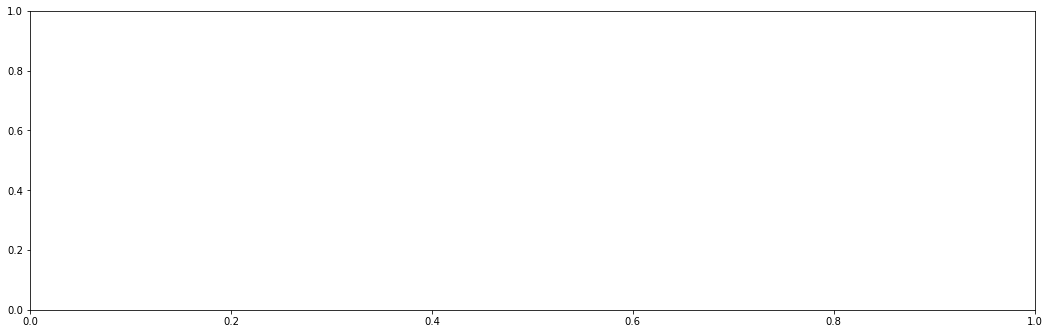

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt


_, ax = plt.subplots(figsize=(18,5.5))   # Vytvoříme dostatečně veliký graf
sns.heatmap(
    pivot_by_year_and_month,
    ax=ax,                  # Kreslíme do připraveného objektu `Axes`
    linewidths=1,           # Oddělíme jednotlivá okénka
    annot=True,             # Chceme zobrazit hodnoty
    fmt=".0f",                # Zobrazíme hodnoty jako celá čísla
    # norm=log_norm,          # Použijeme škálování
    cmap="flare",            # Vybereme si barevnou paletu
    cbar=False,             # Schováme barevný proužek vpravo, nepotřebujeme ho
);

The are also shortcut functions and methods: [DataFrame.pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html), 
[pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
or [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html). 
A nice overview is in the the [Pandas documentation: Reshaping and pivot tables](https://pandas.pydata.org/docs/user_guide/reshaping.html).

## Final mini-project - creative, unbounded, free-style

Here are some ideas of what you can do with the data.

* TODO